In [488]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

When you're done, submit a link to your work below.

## CODE

First we load the dataset and explore number of rows and columns

In [489]:
PATH = '/Users/Stephanie/desktop/thinkful/projects/3_bootcamp/U2L1P8/complete.csv'

df = pd.read_csv(PATH)

### Exploring the data: univariate

In [490]:
print('rows: {}, columns: {}'.format(len(df), len(df.columns)))

rows: 17994, columns: 185


we want to select three continous variables and two categorical. Let's see some of the columns and types

In [491]:
# non boolean
df.dtypes[df.dtypes != bool].head(15)

ID               int64
name            object
full_name       object
club            object
club_logo       object
special          int64
age              int64
league          object
birth_date      object
height_cm      float64
weight_kg      float64
body_type       object
flag            object
nationality     object
photo           object
dtype: object

We did the same thing for boolean and decided on our selection. We want to create a model that predicts the player's wage, so wage will be our outcome. We will use the following variables: age, value, overall, leadership trait and league. Age and overall are integers but fit as continious variables.

We're only going to select the five best known leagues in europe

In [492]:
# we select only the 5 best known european leagues
leagues = list(df.league.unique()[:5])
df = df[df.league.isin(leagues)]

# select variables
df_fball = df[['eur_wage', 'age', 'eur_value', 'overall', 'leadership_trait', 'league']]

In [493]:
len(df_fball)

2950

In [494]:
df_fball.head()

,eur_wage,age,eur_value,overall,leadership_trait,league
0,565000.0,32,95500000.0,94,False,Spanish Primera División
1,565000.0,30,105000000.0,93,False,Spanish Primera División
2,280000.0,25,123000000.0,92,False,French Ligue 1
3,510000.0,30,97000000.0,92,False,Spanish Primera División
4,230000.0,31,61000000.0,92,False,German Bundesliga


In [495]:
# We'll shorten league names
league = df_fball.loc[:, 'league'].apply(lambda x: x.split()[0])
df_fball.league = league

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Now, we only have approx. 3000 rows. Let's see if there's any missing data

In [496]:
df_fball.isna().sum()

eur_wage            0
age                 0
eur_value           0
overall             0
leadership_trait    0
league              0
dtype: int64

In [497]:
for col in df_fball:
    print(col)

eur_wage
age
eur_value
overall
leadership_trait
league


### Exploring the data: multivariate

In [498]:
binary = df_fball.leadership_trait.apply(lambda x: 1 if x == True else 0)
df_fball.leadership_trait = binary

df_plot = df_fball.copy()

#we now add jittered to 'leadership trait' variable
df_plot.leadership_trait = binary + np.random.uniform(-.3, .3, size=(binary.shape))

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


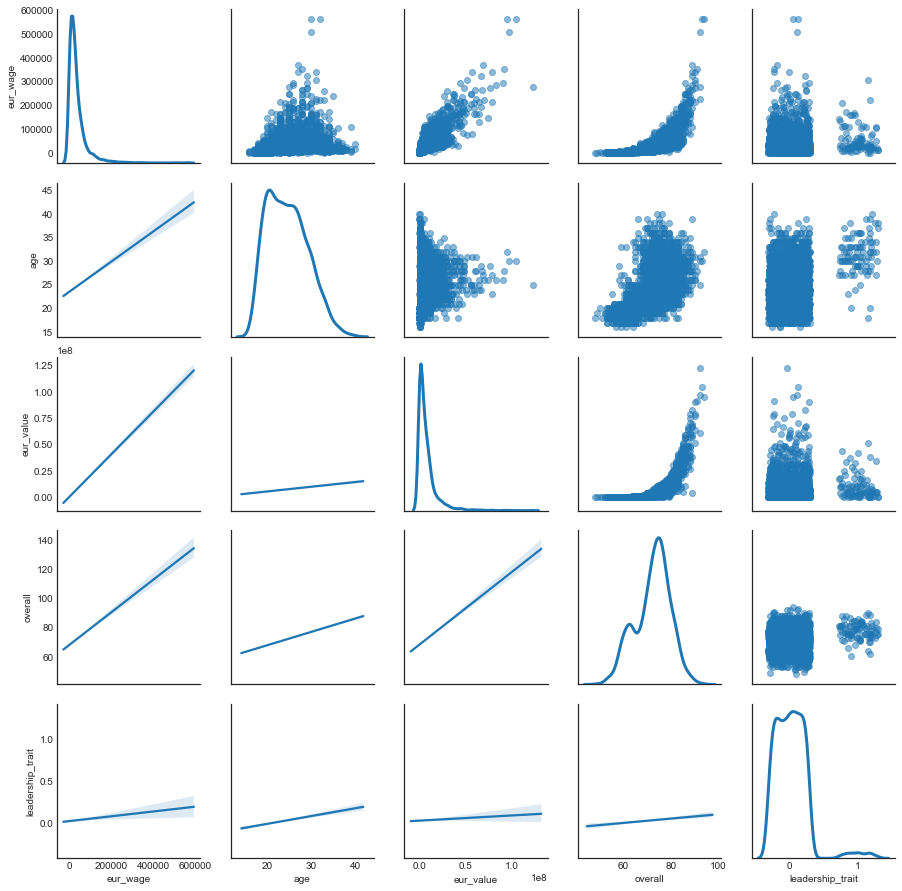

In [499]:
sns.set_style("white")

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_plot, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                  eur_wage       age  eur_value   overall  leadership_trait
eur_wage          1.000000  0.316631   0.848886  0.684789          0.081725
age               0.316631  1.000000   0.189680  0.568343          0.259977
eur_value         0.848886  0.189680   1.000000  0.725818          0.042131
overall           0.684789  0.568343   0.725818  1.000000          0.135570
leadership_trait  0.081725  0.259977   0.042131  0.135570          1.000000


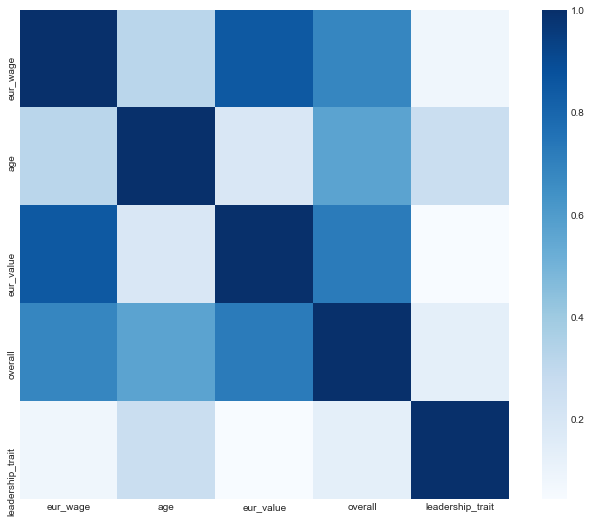

In [500]:
# Make the correlation matrix.
corrmat = df_fball.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True, cmap="Blues")
plt.show()

In [501]:
# Select only numeric variables to scale.
df_num = df_fball.select_dtypes(include=[np.number]).dropna()
names=df_num.columns
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)


In [502]:
df_scaled['league'] = df_fball['league']
df_long = pd.melt(df_scaled, id_vars=['league'])

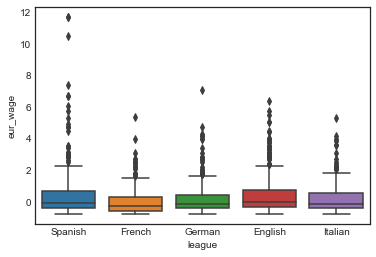

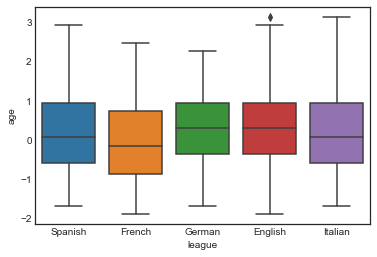

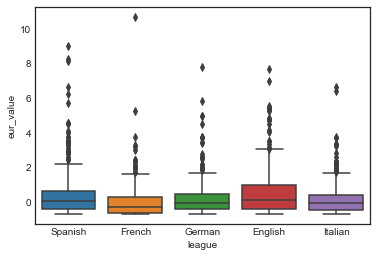

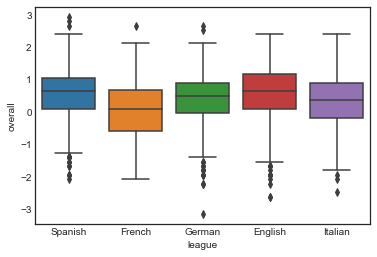

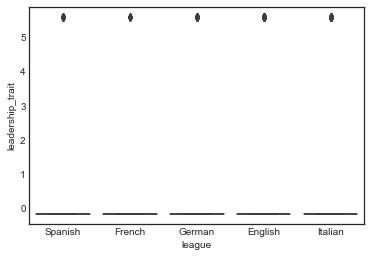

In [503]:
variables = df_long.variable.unique()

for var in variables:
    var_long = df_long[df_long.variable == var]
    plt.figure()
    sns.boxplot(x="league", y="value", data=var_long)
    plt.ylabel(var)
    plt.plot()

In [504]:
df_fball.head()

,eur_wage,age,eur_value,overall,leadership_trait,league
0,565000.0,32,95500000.0,94,0,Spanish
1,565000.0,30,105000000.0,93,0,Spanish
2,280000.0,25,123000000.0,92,0,French
3,510000.0,30,97000000.0,92,0,Spanish
4,230000.0,31,61000000.0,92,0,German


In [505]:
# Descriptive statistics by group.
print(df_fball.groupby('league').describe())

           age                                                    eur_value  \
         count       mean       std   min   25%   50%   75%   max     count   
league                                                                        
English  654.0  24.711009  4.769797  16.0  20.0  25.0  28.0  38.0     654.0   
French   598.0  24.249164  4.520913  17.0  21.0  23.5  27.0  40.0     598.0   
German   537.0  24.243948  4.366819  17.0  20.0  24.0  27.0  38.0     537.0   
Italian  559.0  25.254025  4.855608  16.0  22.0  25.0  29.0  40.0     559.0   
Spanish  602.0  24.908638  4.168652  17.0  21.0  25.0  28.0  37.0     602.0   

                       ...  leadership_trait      overall             \
                 mean  ...               75%  max   count       mean   
league                 ...                                             
English  9.091483e+06  ...               0.0  1.0   654.0  72.409786   
French   5.184181e+06  ...               0.0  1.0   598.0  70.453177   
German 

### Creating new features

In [506]:
features = pd.get_dummies(df_fball['league'])

# Nordic countries dummy.
features['South European'] = np.where((df_fball['league'].isin(['Spanish', 'Italian'])), 1, 0)

print(pd.crosstab(features['South European'], df_fball['league']))

league          English  French  German  Italian  Spanish
South European                                           
0                   654     598     537        0        0
1                     0       0       0      559      602


In [507]:
df_fball.age.describe()

count    2950.000000
mean       24.675593
std         4.559562
min        16.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        40.000000
Name: age, dtype: float64

In [508]:
features['senior'] = np.where(df_fball['age']>=30, 1, 0)

# Check to make sure it worked.
print(df_fball['age'].groupby(features['senior']).describe())

         count       mean       std   min   25%   50%   75%   max
senior                                                           
0       2462.0  23.219740  3.350215  16.0  20.0  23.0  26.0  29.0
1        488.0  32.020492  2.097126  30.0  30.0  31.0  33.0  40.0


In [509]:
means = df_fball[['eur_value','overall']].mean(axis=0)
stds = df_fball[['eur_value','overall']].std(axis=0)
features['value_overall'] = ((df_fball[['eur_value','overall']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df_fball.loc[:, ['eur_value', 'overall']]
plotdf['value_overall'] = features['value_overall'] 
corrmat2 = plotdf.corr()

print(corrmat2)

               eur_value   overall  value_overall
eur_value       1.000000  0.725818       0.928929
overall         0.725818  1.000000       0.928929
value_overall   0.928929  0.928929       1.000000


In [510]:
features['age_squared'] = df_fball['age'] * df_fball['age']

In [511]:
df_fball.head()

,eur_wage,age,eur_value,overall,leadership_trait,league
0,565000.0,32,95500000.0,94,0,Spanish
1,565000.0,30,105000000.0,93,0,Spanish
2,280000.0,25,123000000.0,92,0,French
3,510000.0,30,97000000.0,92,0,Spanish
4,230000.0,31,61000000.0,92,0,German


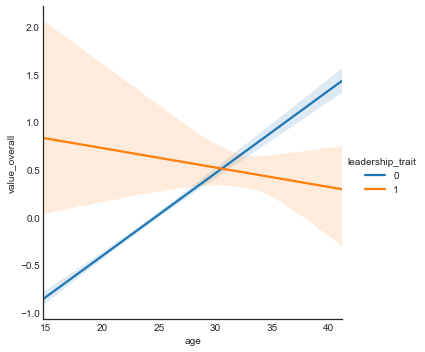

In [512]:
features['age'] = df_fball['age']
features['leadership_trait'] = df_fball['leadership_trait']
sns.lmplot(
    x='age',
    y='value_overall',
    hue='leadership_trait',
    data=features,
    scatter=False
)
plt.show()

In [513]:
features['leader_value'] = features['value_overall'] * features['leadership_trait']

### Filter features

#### PCA

In [514]:
X = StandardScaler().fit_transform(features)

In [515]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

print(sklearn_pca.components_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.254 0.184 0.113]
[[-0.033 -0.094 -0.069  0.116  0.081  0.16   0.453  0.276  0.53   0.527
   0.258  0.182]
 [ 0.301  0.253  0.23  -0.371 -0.422 -0.646  0.128  0.025  0.138  0.133
   0.07   0.023]
 [-0.305  0.052  0.291  0.13  -0.143 -0.014 -0.117 -0.03  -0.171 -0.175
   0.552  0.635]]


#### Univariate Selection

In [516]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)
features_norm= pd.DataFrame(np_scaled)

In [519]:
# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(features_norm, df_fball['eur_wage'])
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[582.666 240.562 203.648 211.862 256.234 166.549 321.945 120.148  95.644
  98.664 241.276   5.273]
[[-0.534 -0.504  1.975  2.246 -0.178]
 [-0.534 -0.504  1.975  2.246 -0.178]
 [-0.534  1.983 -0.506 -0.445 -0.178]
 [-0.534 -0.504  1.975  2.246 -0.178]
 [-0.534 -0.504 -0.506  2.246 -0.178]]
